<a href="https://colab.research.google.com/github/TianruiZhang/Zeiss/blob/main/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modelling with BERT

## Setup

In [ ]:
# %%bash
# if ! [[ "18.04 20.04 21.04" == *"$(lsb_release -rs)"* ]];
# then
#     echo "Ubuntu $(lsb_release -rs) is not currently supported.";
#     exit;
# fi

# sudo su
# curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -

# curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list > /etc/apt/sources.list.d/mssql-release.list

# exit
# sudo apt-get update
# sudo ACCEPT_EULA=Y apt-get install -y msodbcsql18
# # optional: for bcp and sqlcmd
# sudo ACCEPT_EULA=Y apt-get install -y mssql-tools18
# echo 'export PATH="$PATH:/opt/mssql-tools18/bin"' >> ~/.bashrc
# source ~/.bashrc
# # optional: for unixODBC development headers
# sudo apt-get install -y unixodbc-dev

In [ ]:
%%capture
!pip install -U pyodbc

!pip install sentence-transformers umap-learn hdbscan

!pip install pkuseg fastHan

!pip install stopwordsiso zhon

## Database Connection

In [ ]:
# import pyodbc

# driver = "{ODBC Driver 18 for SQL Server}"
# server = "tcp:diccloud.database.chinacloudapi.cn"
# database = "GADataExport"
# uid = "dicadmin"
# password = "Zeiss2022"
# connection = pyodbc.connect(f"DRIVER={driver};SERVER={server};DATABASE={database};UID={uid};PWD={password}")

## Read Data from Text File

In [ ]:
import os

path = "/content/user_text.txt"

if os.path.exists(path):
  with open(path, "r") as f:
    sentences = f.readlines()
  sentences = list(set([sentence[:-1] for sentence in sentences]))
else:
  assert 1 < 2, "user_text.txt not exists!"

## Tokenization

### Stopwords

In [ ]:
from stopwordsiso import stopwords
from string import punctuation

all_stopwords = []
chinese_stopwords = ["、","。","〈","〉","《","》","一","一些","一何","一切","一则","一方面","一旦","一来","一样","一般","一转眼","七","万一","三","上","上下","下","不","不仅","不但","不光","不单","不只","不外乎","不如","不妨","不尽","不尽然","不得","不怕","不惟","不成","不拘","不料","不是","不比","不然","不特","不独","不管","不至于","不若","不论","不过","不问","与","与其","与其说","与否","与此同时","且","且不说","且说","两者","个","个别","中","临","为","为了","为什么","为何","为止","为此","为着","乃","乃至","乃至于","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","二来","于","于是","于是乎","云云","云尔","五","些","亦","人","人们","人家","什","什么","什么样","今","介于","仍","仍旧","从","从此","从而","他","他人","他们","他们们","以","以上","以为","以便","以免","以及","以故","以期","以来","以至","以至于","以致","们","任","任何","任凭","会","似的","但","但凡","但是","何","何以","何况","何处","何时","余外","作为","你","你们","使","使得","例如","依","依据","依照","便于","俺","俺们","倘","倘使","倘或","倘然","倘若","借","借傥然","假使","假如","假若","做","像","儿","先不先","光是","全体","全部","八","六","兮","共","关于","关于具体地说","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","兼之","内","再","再其次","再则","再有","再者","再者说","再说","冒","冲","况且","几","几时","凡","凡是","凭","凭借","出于","出来","分","分别","则","则甚","别","别人","别处","别是","别的","别管","别说","到","前后","前此","前者","加之","加以","即","即令","即使","即便","即如","即或","即若","却","去","又","又及","及","及其","及至","反之","反而","反过来","反过来说","受到","另","另一方面","另外","另悉","只","只当","只怕","只是","只有","只消","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","后","后者","向","向使","向着","吓","吗","否则","吧","吧哒","含","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呵呵","呸","呼哧","咋","和","咚","咦","咧","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","唯有","啊","啐","啥","啦","啪达","啷当","喂","喏","喔唷","喽","嗡","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","嘿嘿","四","因","因为","因了","因此","因着","因而","固然","在","在下","在于","地","基于","处在","多","多么","多少","大","大家","她","她们","好","如","如上","如上所述","如下","如何","如其","如同","如是","如果","如此","如若","始而","孰料","孰知","宁","宁可","宁愿","宁肯","它","它们","对","对于","对待","对方","对比","将","小","尔","尔后","尔尔","尚且","就","就是","就是了","就是说","就算","就要","尽","尽管","尽管如此","岂但","己","已","已矣","巴","巴巴","年","并","并且","庶乎","庶几","开外","开始","归","归齐","当","当地","当然","当着","彼","彼时","彼此","往","待","很","得","得了","怎","怎么","怎么办","怎么样","怎奈","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","惟其","慢说","我","我们","或","或则","或是","或曰","或者","截至","所","所以","所在","所幸","所有","才","才能","打","打从","把","抑或","拿","按","按照","换句话说","换言之","据","据此","接着","故","故此","故而","旁人","无","无宁","无论","既","既往","既是","既然","日","时","时候","是","是以","是的","更","曾","替","替代","最","月","有","有些","有关","有及","有时","有的","望","朝","朝着","本","本人","本地","本着","本身","来","来着","来自","来说","极了","果然","果真","某","某个","某些","某某","根据","欤","正值","正如","正巧","正是","此","此地","此处","此外","此时","此次","此间","毋宁","每","每当","比","比及","比如","比方","没奈何","沿","沿着","漫说","焉","然则","然后","然而","照","照着","犹且","犹自","甚且","甚么","甚或","甚而","甚至","甚至于","用","用来","由","由于","由是","由此","由此可见","的","的确","的话","直到","相对而言","省得","看","眨眼","着","着呢","矣","矣乎","矣哉","离","秒","竟而","第","等","等到","等等","简言之","管","类如","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继之","继后","继而","综上所述","罢了","者","而","而且","而况","而后","而外","而已","而是","而言","能","能否","腾","自","自个儿","自从","自各儿","自后","自家","自己","自打","自身","至","至于","至今","至若","致","般的","若","若夫","若是","若果","若非","莫不然","莫如","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","譬喻","譬如","让","许多","论","设使","设或","设若","诚如","诚然","该","说","说来","请","诸","诸位","诸如","谁","谁人","谁料","谁知","贼死","赖以","赶","起","起见","趁","趁着","越是","距","跟","较","较之","边","过","还","还是","还有","还要","这","这一来","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这次","这般","这边","这里","进而","连","连同","逐步","通过","遵循","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那般","那边","那里","都","鄙人","鉴于","针对","阿","除","除了","除外","除开","除此之外","除非","随","随后","随时","随着","难道说","零","非","非但","非徒","非特","非独","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]
user_defined_stopwords = ["手术"]
all_stopwords.extend(chinese_stopwords)
all_stopwords.extend(stopwords("zh"))
all_stopwords.extend(list(punctuation))
all_stopwords.extend(user_defined_stopwords)
all_stopwords = list(set(all_stopwords))

### pkuseg

In [ ]:
import pkuseg
seg = pkuseg.pkuseg(model_name="medicine")
tokens = [
          " ".join(filter(lambda x: x not in all_stopwords, seg.cut(sentence)))
          for sentence in sentences
]

Downloading: "https://github.com/lancopku/pkuseg-python/releases/download/v0.0.16/medicine.zip" to /root/.pkuseg/medicine.zip
100%|██████████| 48189165/48189165 [00:01<00:00, 27209947.59it/s]


### FastHan

In [ ]:
from fastHan import FastHan

model = FastHan(model_type="large")

loading vocabulary file /root/.fastNLP/fasthan/fasthan_large/vocab.txt
Load pre-trained BERT parameters from file /root/.fastNLP/fasthan/fasthan_large/model.bin.


In [ ]:
tokens = [
          " ".join(filter(lambda x: x not in all_stopwords, model(sentence)[0]))
          for sentence in sentences
]

## Embedding Generation

In [ ]:
from sentence_transformers import SentenceTransformer


model_name = "paraphrase-multilingual-MiniLM-L12-v2"
model = SentenceTransformer(model_name)
embeddings = model.encode(sentences, show_progress_bar=True)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

## Dimensionality Reduction

UMAP starts by finding the nearest neighbors using the Nearest-Neighbor-Descent algorithm of Dong et al. *n_neighbors* controls how UMAP balances local versus global structure in the data. 

Essentially, a small value for n_neighbors means that we want a very local interpretation that accurately captures the fine detail of the structure. In contrast, a large n_neighbors value means that our estimates will be based on larger regions, thus more broadly accurate across the manifold as a whole.

In [ ]:
from umap import UMAP

n_neighbors = 4
n_components = 128
min_dist=0.0001

umap_sentence_embeddings = UMAP(
    n_neighbors=n_neighbors, 
    n_components=n_components,
    min_dist=min_dist,
    metric="cosine"
).fit_transform(embeddings) 

## Clustering

We can cluster the documents with HDBSCAN. HDBSCAN is a density-based algorithm that works quite well with UMAP since UMAP maintains a lot of local structure even in lower-dimensional space. Moreover, HDBSCAN does not force data points to clusters as it considers them outliers.

In [ ]:
from hdbscan import HDBSCAN

metric = "euclidean"
min_cluster_size = 10
min_samples = None
cluster = HDBSCAN(
    metric=metric,
    min_cluster_size=min_cluster_size,
    min_samples=min_samples
).fit(umap_sentence_embeddings)

## Visualize Data

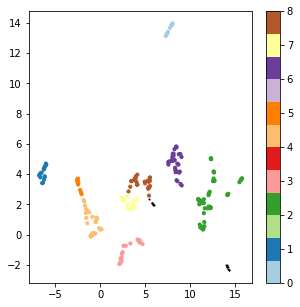

In [ ]:
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt

vis_embedding = UMAP(
    n_neighbors=n_neighbors,
    n_components=2,
    metric="cosine"
).fit_transform(embeddings)

result = pd.DataFrame(vis_embedding, columns=["x", "y"])
result["labels"] = cluster.labels_

fig, ax = plt.subplots(figsize=(5, 5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color="black", s=1);
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10, cmap="Paired");
plt.colorbar();

## Topic Creation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = vectorizer.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    return tf_idf, vectorizer

def extract_words_per_topic(tf_idf, vectorizer, docs_per_topic):
    words = vectorizer.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()
    top_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_words

def extract_topic_sizes(df):
    topic_sizes = df.groupby(["Topic"]).Doc.count().reset_index()
    topic_sizes = topic_sizes.rename({"Doc": "Size"}, axis="columns")
    topic_sizes = topic_sizes.sort_values("Size", ascending=False).reset_index(drop=True)
    return topic_sizes

docs_df = pd.DataFrame(tokens, columns=["Doc"])
docs_df["Topic"] = cluster.labels_
docs_df["Doc_ID"] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index=False).agg({"Doc": " ".join})
tf_idf, vectorizer = c_tf_idf(docs_per_topic.Doc.values, m=len(sentences))
extracted_words = extract_words_per_topic(tf_idf, vectorizer, docs_per_topic)
topic_sizes = extract_topic_sizes(docs_df);
if -1 in topic_sizes.Topic.values:
  num_topics = len(topic_sizes) - 1
else:
  num_topics = len(topic_sizes)
print(f"Number of topics: {num_topics}"); topic_sizes

Number of topics: 9


,Topic,Size
0,2,51
1,6,32
2,4,27
3,8,25
4,3,20
5,7,19
6,1,18
7,-1,17
8,0,12
9,5,11


## Show Topics

In [ ]:
Topic =  5#@param {type:"integer"}
print(extracted_words[Topic])

[('全飞秒', 0.8557275678164892), ('价格', 0.6738432100922523), ('半飞秒', 0.3802872152885092), ('镜片', 0.2178694948666524), ('价位', 0.1901436076442546), ('大概', 0.1901436076442546), ('请问', 0.1901436076442546), ('双眼皮', 0.173925003319928), ('飞秒', 0.16241772042185676), ('需要', 0.13469183319945896), ('费用', 0.11230720168204206), ('近视', 0.08603602022647923), ('切除', 0.0), ('医保卡', 0.0), ('医保', 0.0), ('动手术', 0.0), ('办理', 0.0), ('力学', 0.0), ('到院', 0.0), ('分类', 0.0), ('分院', 0.0), ('儿童', 0.0), ('出院', 0.0), ('医生', 0.0), ('几点', 0.0), ('准备', 0.0), ('军嫂', 0.0), ('再次', 0.0), ('做完', 0.0), ('入院', 0.0), ('出血', 0.0), ('去年', 0.0), ('医院', 0.0), ('厚度', 0.0), ('屈光', 0.0), ('小孩子', 0.0), ('安全', 0.0), ('好多', 0.0), ('大约', 0.0), ('多久', 0.0), ('外市', 0.0), ('外地', 0.0), ('复查', 0.0), ('备考', 0.0), ('基本', 0.0), ('回复', 0.0), ('咨询', 0.0), ('告诉', 0.0), ('后遗症', 0.0), ('发票手', 0.0), ('去掉', 0.0), ('保养期', 0.0), ('原因', 0.0), ('做好', 0.0), ('麻药', 0.0), ('住院', 0.0), ('23', 0.0), ('480', 0.0), ('450', 0.0), ('350', 0.0), ('300', 0.0), ('30', 0.0

## Optional: Topic Reduction

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

remaining_num_topics = 6
reduction = num_topics - remaining_num_topics

for _ in range(reduction):
  similarities = cosine_similarity(tf_idf.T)
  np.fill_diagonal(similarities, 0)
  topic_sizes = docs_df.groupby(["Topic"], as_index=False).count().sort_values("Doc", ascending=False)
  topic_to_merge = topic_sizes.iloc[-1].Topic
  topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

  docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
  old_topics = docs_df.sort_values("Topic").Topic.unique()
  map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
  docs_df.Topic = docs_df.Topic.map(map_topics)
  docs_per_topic = docs_df.groupby(["Topic"], as_index = False).agg({"Doc": " ".join})
  m = len(sentences)
  tf_idf, vectorzier = c_tf_idf(docs_per_topic.Doc.values, m)
  extracted_words = extract_words_per_topic(tf_idf, vectorzier, docs_per_topic)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,5,43
1,2,39
2,4,39
3,-1,33
4,1,32
5,0,29
6,3,17
